In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
sns.set_style("darkgrid")

In [14]:
data = pd.read_csv("Data/Basketball.csv")

In [15]:
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [16]:
data.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [17]:
data.set_index('Team',inplace = True)

In [18]:
#data Cleaning 
# as team 61 has no data we will drop it 
data.drop(data.index[-1],inplace = True)

# as both col has no enough data we will drop it 
data = data.drop(['TournamentChampion','Runner-up'],axis= 1)

In [19]:
data.tail()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld
Team,,,,,,,,,,
Team 56,1,35,38,8,11,19,36,55,2016_17,17
Team 57,1,34,38,8,10,20,38,66,2009-10,20
Team 58,1,22,30,7,8,15,37,57,1956-57,16
Team 59,1,19,30,7,5,18,51,85,1951~52,16
Team 60,1,14,30,5,4,21,34,65,1955-56,15


In [20]:
data.shape

(60, 10)

In [21]:
data.isnull().sum()

Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Team 1 to Team 60
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tournament           60 non-null     int64 
 1   Score                60 non-null     object
 2   PlayedGames          60 non-null     object
 3   WonGames             60 non-null     object
 4   DrawnGames           60 non-null     object
 5   LostGames            60 non-null     object
 6   BasketScored         60 non-null     object
 7   BasketGiven          60 non-null     object
 8   TeamLaunch           60 non-null     object
 9   HighestPositionHeld  60 non-null     int64 
dtypes: int64(2), object(8)
memory usage: 5.2+ KB


In [23]:
obj_col = ['Score','PlayedGames','WonGames','DrawnGames','LostGames',
           'BasketScored','BasketGiven','TeamLaunch'] 

In [58]:
print('before reformatting')
print(data['TeamLaunch'][:10])

data['TeamLaunch'] = data['TeamLaunch'].str.slice(start = 0,stop = 4)

print('afterreformatting')
print(data['TeamLaunch'][:10])

before reformatting
Team
Team 1     1929
Team 2     1929
Team 3     1929
Team 4     1931
Team 5     1929
Team 6     1934
Team 7     1929
Team 8     1929
Team 9     1939
Team 10    1932
Name: TeamLaunch, dtype: int64


AttributeError: Can only use .str accessor with string values!

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tournament,60.0,24.383333,26.884620,1.0,4.0,12.0,39.0,86.0
HighestPositionHeld,60.0,7.050000,5.315232,1.0,3.0,6.0,10.0,20.0


<b>CONVERSATION OF COLUMNS FROM Object TYPE TO Int TYPE</b>
<p>we can see that only two of them are int and rest are object type so we can convert them into int64 because the data inside them are of type int type and perform describe fuunction and plot them


In [28]:
for col in obj_col:
    data[col] = pd.to_numeric(data[col])

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Team 1 to Team 60
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Tournament           60 non-null     int64
 1   Score                60 non-null     int64
 2   PlayedGames          60 non-null     int64
 3   WonGames             60 non-null     int64
 4   DrawnGames           60 non-null     int64
 5   LostGames            60 non-null     int64
 6   BasketScored         60 non-null     int64
 7   BasketGiven          60 non-null     int64
 8   TeamLaunch           60 non-null     int64
 9   HighestPositionHeld  60 non-null     int64
dtypes: int64(10)
memory usage: 5.2+ KB


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tournament,60.0,24.383333,26.884620,1.0,4.00,12.0,39.00,86.0
Score,60.0,916.450000,1138.342899,14.0,104.25,395.5,1360.50,4385.0
PlayedGames,60.0,810.100000,877.465393,30.0,115.50,424.5,1345.50,2762.0
WonGames,60.0,309.033333,408.481395,5.0,34.75,124.0,432.75,1647.0
DrawnGames,60.0,192.083333,201.985508,4.0,26.25,98.5,331.50,633.0
LostGames,60.0,308.816667,294.508639,15.0,62.75,197.5,563.50,1070.0
BasketScored,60.0,1159.350000,1512.063948,34.0,154.50,444.0,1669.75,5947.0
BasketGiven,60.0,1159.233333,1163.946914,55.0,236.00,632.5,2001.25,3889.0
TeamLaunch,60.0,1957.950000,26.646732,1929.0,1934.75,1950.5,1977.25,2016.0
HighestPositionHeld,60.0,7.050000,5.315232,1.0,3.00,6.0,10.00,20.0


<b> Adding Some Additional Columns for better analysing </b>

In [59]:
# matches Winning percentage of a team in the matches they played
data['WinPercent'] = round((data['WonGames']+data['DrawnGames'])/data['PlayedGames']*100,2)

# matches lost percentage of a team in the matches they played
data['LossPercent'] = round(data['LostGames']/data['PlayedGames']*100,2)

# matcheswon to  lost ratio of a team in the matches they played
data['WinLossRatio'] = round(data['WonGames']/data['LostGames'],2)

data.head()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld,WinPercent,LossPercent,WinLossRatio
Team,,,,,,,,,,,,,
Team 1,86,4385,2762,1647,552,563,5947,3140,1929,1,79.62,20.38,2.93
Team 2,86,4262,2762,1581,573,608,5900,3114,1929,1,77.99,22.01,2.60
Team 3,80,3442,2614,1241,598,775,4534,3309,1929,1,70.35,29.65,1.60
Team 4,82,3386,2664,1187,616,861,4398,3469,1931,1,67.68,32.32,1.38
Team 5,86,3368,2762,1209,633,920,4631,3700,1929,1,66.69,33.31,1.31


<u><h1> Data Visualization</h1></u>

### TOP 10 TEAMS

<b><u> Top 10 teams Win/Loss ratio </u> </b>

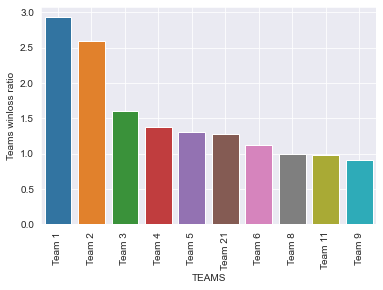

In [35]:
top_winlossratio_df = data['WinLossRatio'].sort_values(ascending = False).head(10)
sns.barplot(y = top_winlossratio_df,x =top_winlossratio_df.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams winloss ratio")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show() 

<b> Top 10 teams Winning Percentage </b>

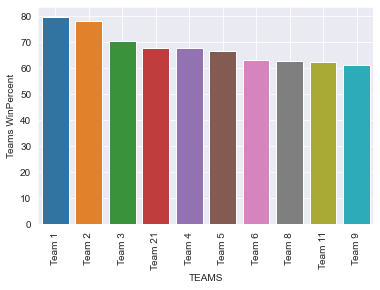

In [36]:
top_winpercent_df = data['WinPercent'].sort_values(ascending = False).head(10)
top_winpercent_df.head()
sns.barplot(y = top_winpercent_df,x = top_winpercent_df.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams WinPercent")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
plt.show() 

<b>Top 10 teams with less lossing percentage </b>

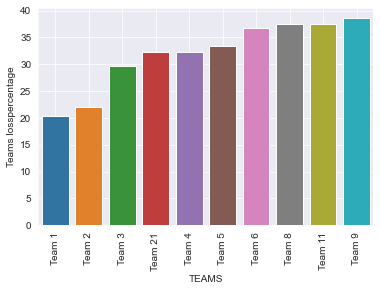

In [37]:
bottom_lossers_df = data['LossPercent'].sort_values(ascending = True).head(10)
sns.barplot(y = bottom_lossers_df,x = bottom_lossers_df.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams losspercentage")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show() 

<b>Top 10 teams with high score</b>

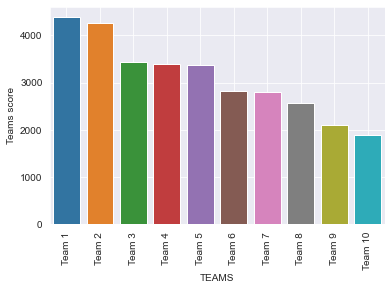

In [38]:
top_scorer_df = data['Score'].sort_values(ascending = False).head(10)
sns.barplot(y = top_scorer_df,x =top_scorer_df.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams score")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show() 

<b>Top 10 teams with high BasketScored </b>

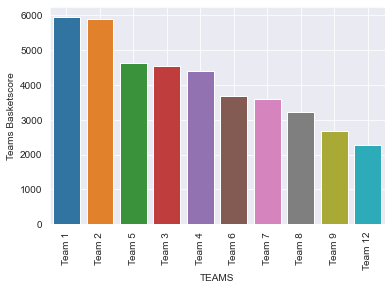

In [39]:
top_basketscore_df = data['BasketScored'].sort_values(ascending = False).head(10)
sns.barplot(y = top_basketscore_df,x = top_basketscore_df.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams Basketscore")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show() 

### Total

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<b>Teams Score PLot</b>

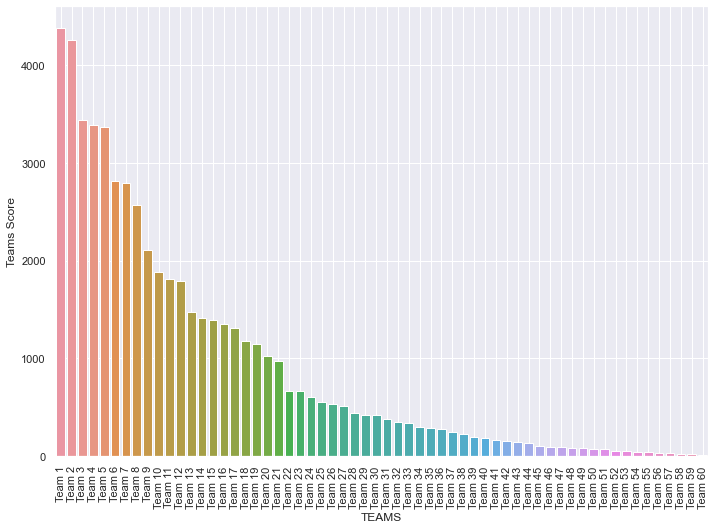

In [41]:
sns.barplot(y = data['Score'],x = data.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams Score")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
plt.show()

<b>Teams matches won PLot</b>

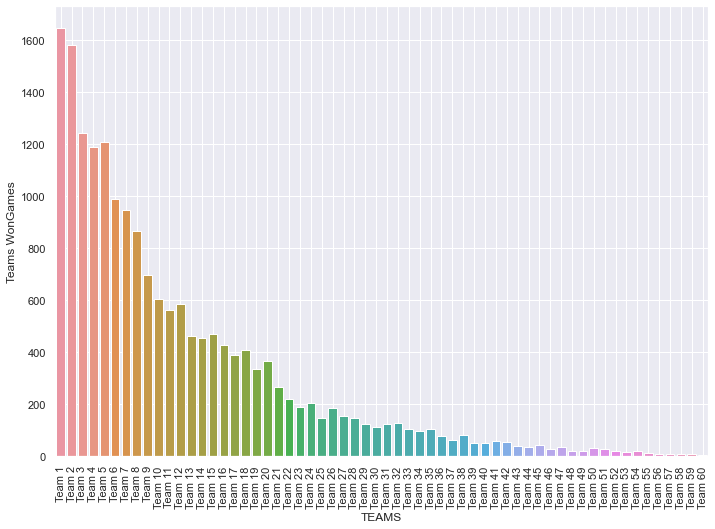

In [42]:
sns.barplot(y = data['WonGames'],x = data.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams WonGames")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show()

<b>Teams BasketScore PLot</b>

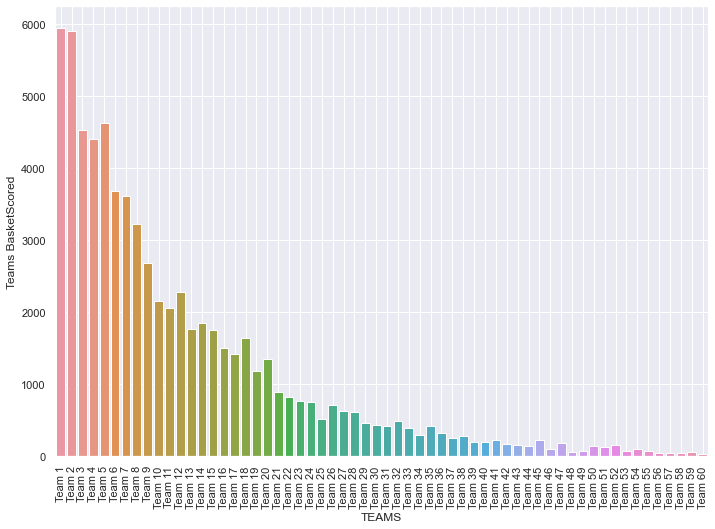

In [43]:
sns.barplot(y = data['BasketScored'],x = data.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams BasketScored")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
plt.show()

<b>Teams Winning Percentage PLot</b>

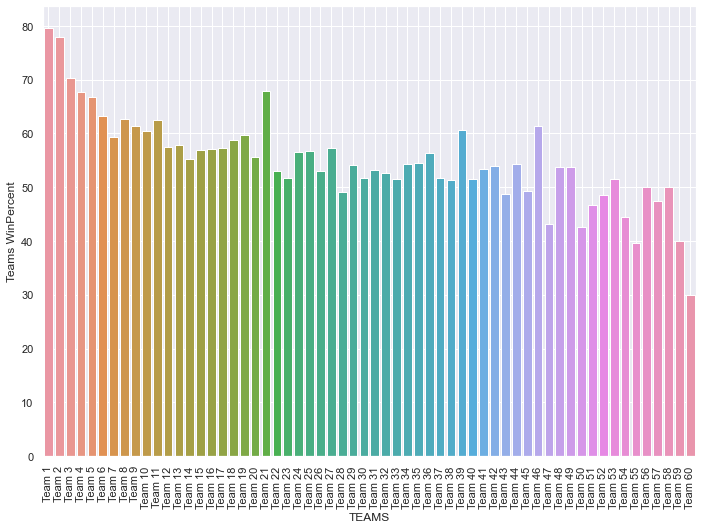

In [44]:
sns.barplot(y = data['WinPercent'],x = data.index.values)
plt.xlabel("TEAMS")
plt.ylabel("Teams WinPercent")
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
#plt.figure(figsize = (20,20))
plt.show()

<b> Various Box Plot </b>

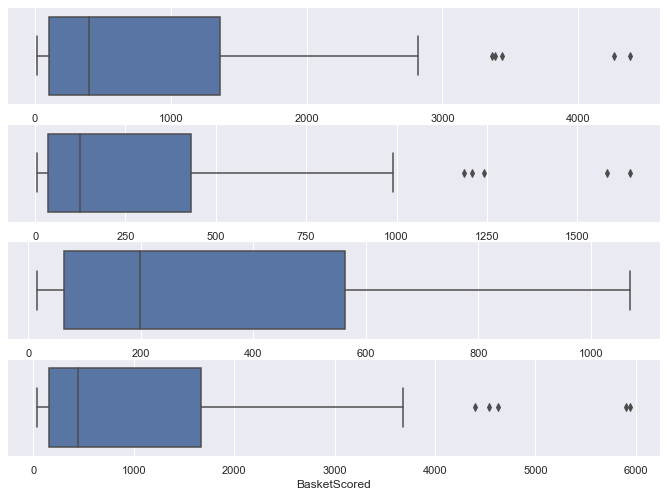

In [66]:
''''Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld' '''
plt.subplot(4,1,1)
sns.boxplot(x = data['Score'])

plt.subplot(4,1,2)
sns.boxplot(x = data['WonGames'])

plt.subplot(4,1,3)
sns.boxplot(x = data['LostGames'])

plt.subplot(4,1,4)
sns.boxplot(x = data['BasketScored'])
plt.show()

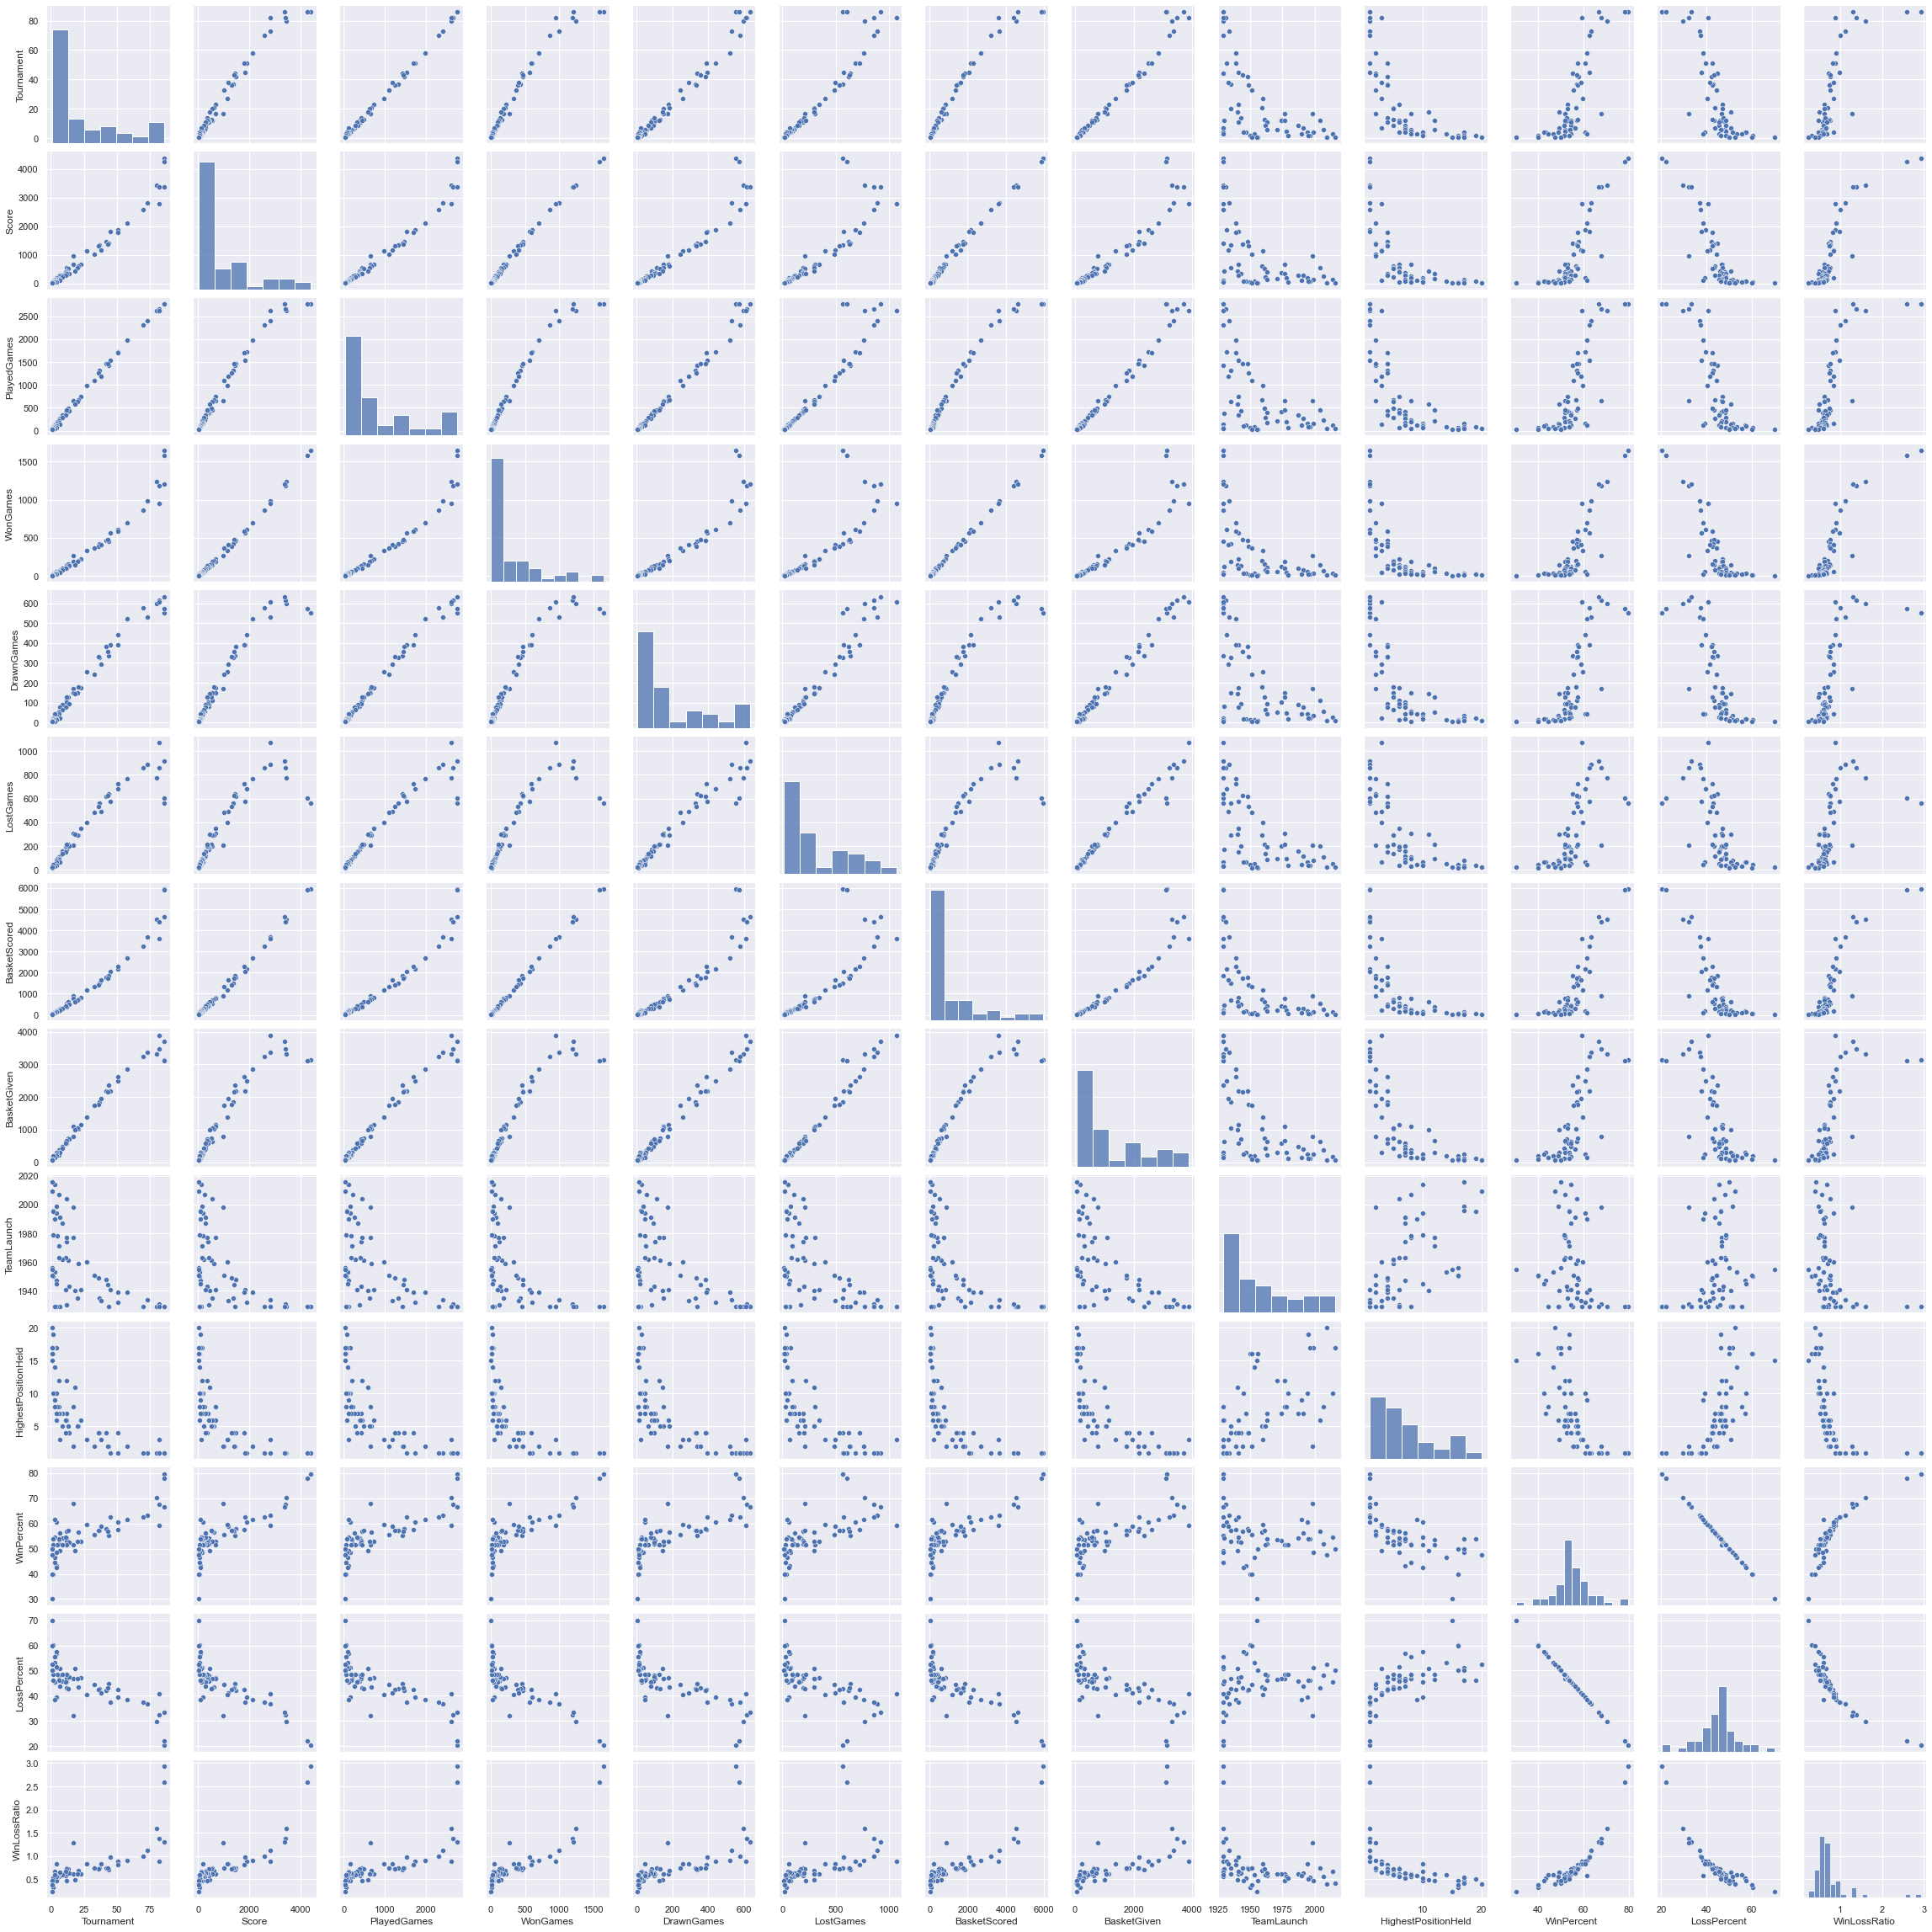

In [67]:
sns.pairplot(data)

In [73]:
print("team Which has won most games = ",data[data['WonGames'] == data['WonGames'].max()].index.values[0])
print("team Which has highest Winning Percentage = ",data[data['WinPercent'] == data['WinPercent'].max()].index.values[0])
print("team Which has lowest loss perecentage  = ",data[data['LossPercent'] == data['LossPercent'].min()].index.values[0])
print("team Which has highest win to loss ratio  = ",data[data['WinLossRatio'] == data['WinLossRatio'].max()].index.values[0])
print("team Which has more scored more baskets = ",data[data['BasketScored'] == data['BasketScored'].max()].index.values[0])
print("team Which has more scored more score = ",data[data['Score'] == data['Score'].max()].index.values[0])

team Which has won most games =  Team 1
team Which has highest Winning Percentage =  Team 1
team Which has lowest loss perecentage  =  Team 1
team Which has highest win to loss ratio  =  Team 1
team Which has more scored more baskets =  Team 1
team Which has more scored more score =  Team 1


# I would recommend to go with team 1

### It has Secured 1 place in all above stats 

#### if 1 is booked then Go for team 2 
#### if 2 is booked then go for team 3
#### if all above are booked then i would recommend team 21


In [70]:
oldest_teams = data[data['TeamLaunch'] == data['TeamLaunch'].min()].index.values

print("Oldest Teams are : ")
for team in oldest_teams:
    print("\t \t\t",team,data.loc[team,'TeamLaunch'])

Oldest Teams are : 
	 		 Team 1 1929
	 		 Team 2 1929
	 		 Team 3 1929
	 		 Team 5 1929
	 		 Team 7 1929
	 		 Team 8 1929
	 		 Team 14 1929
	 		 Team 45 1929
	 		 Team 52 1929
	 		 Team 54 1929


####  I Suggest the Association to to include 
      1 . To add team size or count of players
      2 . Reduce number of null values 
      3 . Enter data in correct format 